<a href="https://colab.research.google.com/github/hugo-dc/comp_vs_stor/blob/master/CompVsStor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Opcodes Gas Usage

This is the result of analyzing a file generated using a modified version of the Erigon `state` command. This command outputs a trace of all transactions in a block, showing all opcodes except for the following considered as Storage Opcodes:

- SLOAD - 0x54
- SSTORE - 0x55
- CALL - 0xf1
- CALLCODE - 0xf2
- DELEATECALL - 0xf4
- STATICCALL - 0xfa
- BALANCE - 0x31
- SELFBALANCE - 0x47
- EXTCODESIZE - 0x3b
- EXTCODECOPY - 0x3c
- EXTCODEHASH - 0x3f
- SELFDESTRUCT - 0xff

In [23]:
import pandas as pd

In [24]:
INPUT_FILE = '/content/sample_data/comp_op_usage.csv'
FSIZE = (16, 16)
columns = ['BlockNumber', 'GasUsed', 'RealGasUsed', 'IntrinsicGas', 'CompGasUsed', 'StorGasUsed', 'CompGasUsedPerc1', 'StorGasUsedPerc1', 'CompGasUsedPerc2', 'StorGasUsedPerc2']

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) + "%" if pct > 0 else ''

In [25]:
df = pd.read_csv(INPUT_FILE, names=columns)
df

,BlockNumber,GasUsed,RealGasUsed,IntrinsicGas,CompGasUsed,StorGasUsed,CompGasUsedPerc1,StorGasUsedPerc1,CompGasUsedPerc2,StorGasUsedPerc2
0,12000028,12393997,12869197,972584,3043024,8853589,24.55,71.43,23.65,68.80
1,12000029,11935344,13400544,2197448,1917400,9285696,16.06,77.80,14.31,69.29
2,12000030,11664408,12932208,2673044,2285524,7973640,19.59,68.36,17.67,61.66
3,12000031,12174734,13459334,3349148,2056188,8053998,16.89,66.15,15.28,59.84
4,12000032,11510075,12663973,2163400,1549676,8950897,13.46,77.77,12.24,70.68
...,...,...,...,...,...,...,...,...,...,...
10391,12010610,10851391,12227108,3081676,1906923,7238509,17.57,66.71,15.60,59.20
10392,12010611,11991943,12569743,1436372,1895154,9238217,15.80,77.04,15.08,73.50
10393,12010612,11372309,12350909,3124720,1795887,7430302,15.79,65.34,14.54,60.16
10394,12010613,9568402,10666498,3063744,1409475,6193279,14.73,64.73,13.21,58.06


## Results

The gas consumed by the transactions executing a contract can be divided in the following groups:

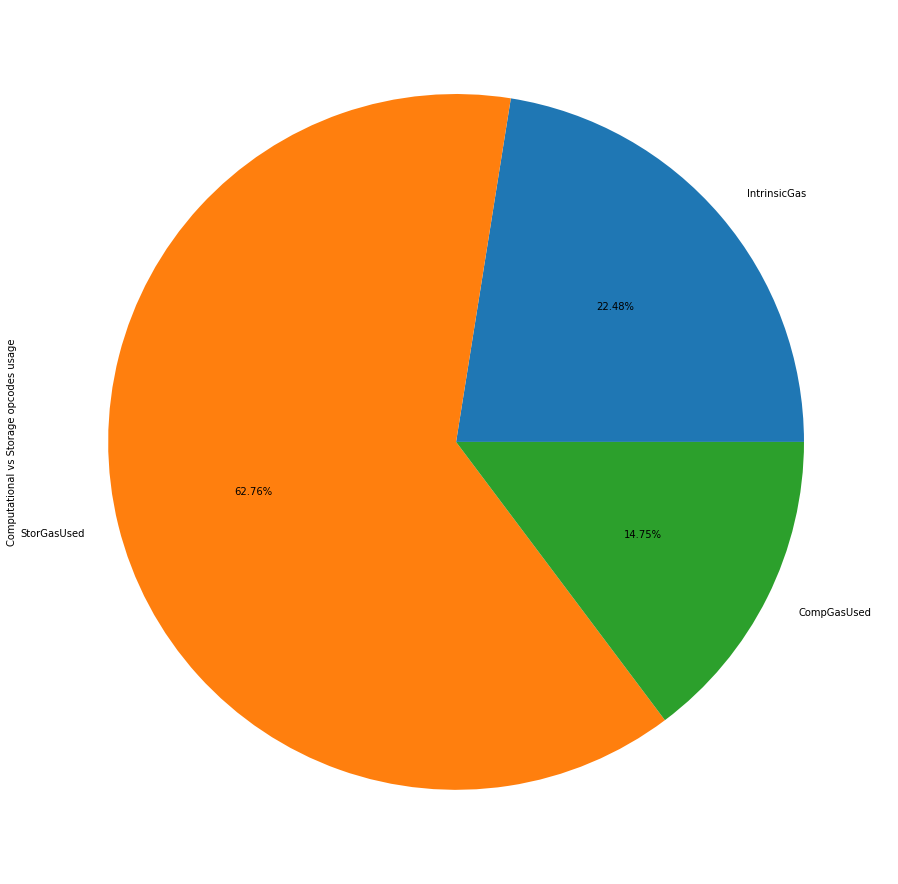

In [33]:
df[['IntrinsicGas', 'StorGasUsed', 'CompGasUsed']].sum().plot(kind='pie', label='Computational vs Storage opcodes usage', figsize=FSIZE, autopct=autopct)

If we divide a transaction gas usage only by Opcode Gas usage, we have the following result comparing Storage vs Computational opcodes:

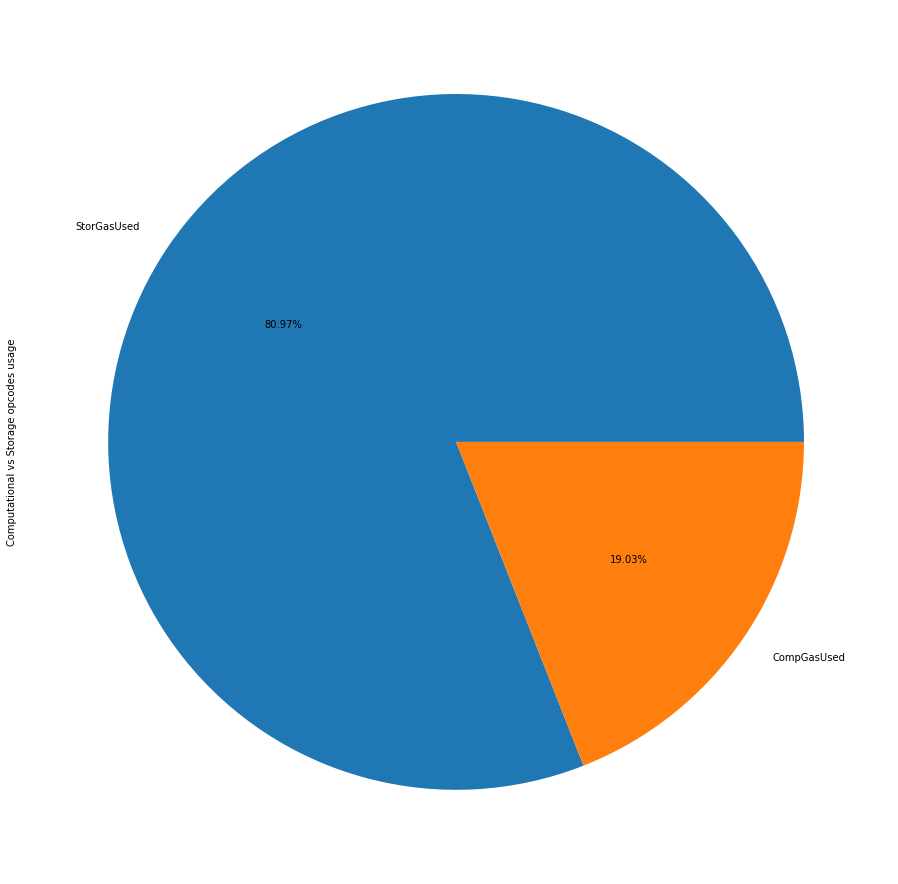

In [34]:
df[['StorGasUsed', 'CompGasUsed']].sum().plot(kind='pie', label='Computational vs Storage opcodes usage', figsize=FSIZE, autopct=autopct)